In [10]:
import numpy as np
import pandas as pd
import pyarrow as pa
from pyarrow import parquet

import matplotlib.pyplot as plt

In [2]:
def get_rel_ebs(table_name):
    if table_name == "ethylene_methane":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        rel_ebs[1] = 0.01
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_methane.parquet"
    elif table_name == "ethylene_CO":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_CO.parquet"
    elif table_name == "heavy_drinking":
        rel_ebs = [10.0] * 3
        parquet_file_or_folder = (
            "../datasets/heavy_drinking/all_accelerometer_data_pids_13.parquet"
        )
    else:
        raise ValueError(f"Unsupported Table Name: {table_name}")
    rel_ebs = [rel_eb * 1e-2 for rel_eb in rel_ebs]
    return rel_ebs, parquet_file_or_folder


def load_data(table_name):
    rel_ebs, path = get_rel_ebs(table_name)
    arrow_table = parquet.read_table(path)
    
    return arrow_table, rel_ebs

In [3]:
table, rel_ebs = load_data("heavy_drinking")

In [4]:
table

pyarrow.Table
time: int64
x: double
y: double
z: double
----
time: [[0,0,1493733882409,1493733882455,1493733882500,...,1493736777617,1493736777619,1493736777627,1493736777631,1493736777641],[1493736777641,1493736777648,1493736777649,1493736777667,1493736777667,...,1493737821975,1493737821985,1493737822000,1493737822009,1493737822025],...,[1493824275576,1493824275577,1493824275595,1493824275601,1493824275620,...,1493828001393,1493828001417,1493828001443,1493828001470,1493828001494],[1493828001518,1493828001542,1493828001568,1493828001595,1493828001617,...,1493829248196,1493829248220,1493829248245,1493829248270,1493829248294]]
x: [[0,0,0.0758,-0.0359,-0.2427,...,-0,0.0005,0.0025,0.0112,-0.0004],[-0.0005,0.0014,-0.042,0,-0.0008,...,0.0091,-0,0.009,-0.0006,-0.0103],...,[0.0852343999999999,0.0007,0.0006,0.066538334,-0.0012,...,0.029138565,0.009840965,0.06714535,0.105213165,0.009912491],[0.08671951,0.06749725,0.087278366,0.030441284,0.1065979,...,-0.13395596,-0.100764275,-0.13185287,-0.14970

In [6]:
df = table.to_pandas()

In [15]:
df.corr(method='spearman')

,time,x,y,z
time,1.000000,-0.016410,0.038047,0.146469
x,-0.016410,1.000000,-0.002553,0.110523
y,0.038047,-0.002553,1.000000,-0.053050
z,0.146469,0.110523,-0.053050,1.000000


In [16]:
df.corr()

,time,x,y,z
time,1.000000,-0.000330,0.005394,-0.005394
x,-0.000330,1.000000,0.058263,-0.058263
y,0.005394,0.058263,1.000000,-1.000000
z,-0.005394,-0.058263,-1.000000,1.000000


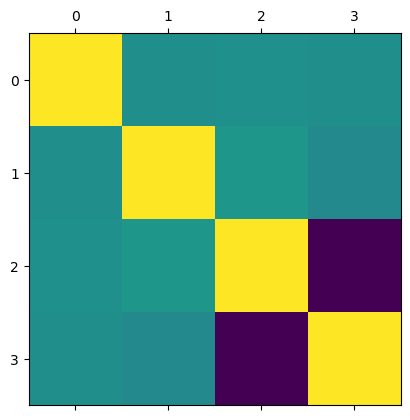

In [11]:
plt.matshow(df.corr())
plt.show()

In [17]:
df.iloc[:10,1:]

,x,y,z
0,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000
2,0.0758,0.0273,-0.0102
3,-0.0359,0.0794,0.0037
4,-0.2427,-0.0861,-0.0163
5,-0.2888,0.0514,-0.0145
6,-0.0413,-0.0184,-0.0105
7,-0.0413,-0.0001,0.0017
8,-0.0286,-0.0028,-0.0094
9,-0.0543,-0.0410,-0.0109
